# makemore


In [1]:
words = open('names.txt','r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

In [ ]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1,ch2 in zip(chs,chs[1:]):
         bigram = (ch1,ch2)
         b[bigram] = b.get(bigram,0)+1 
b

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [7]:
# 注意sorted排序原理：装饰-排序-去装饰
sorted(b.items(),key = lambda kv: -kv[1] )

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

### 简单数值可视化

In [8]:
import torch

In [9]:
N = torch.zeros((28, 28), dtype = torch.int32)

In [10]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i, s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

In [ ]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1,ch2 in zip(chs,chs[1:]):
         ix1 = stoi[ch1]
         ix2 = stoi[ch2]
                   
         bigram = (ch1,ch2)
         b[bigram] = b.get(bigram,0)+1 
         N[ix1,ix2] += 1
         
          

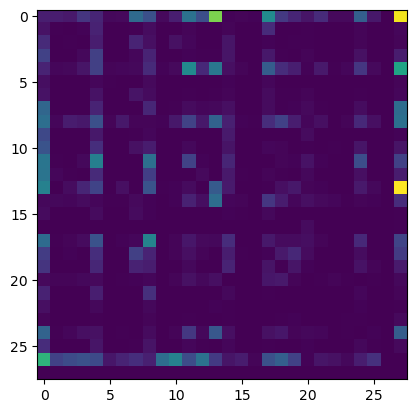

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)
plt.show()

### text可视化
将两个字符标出

In [13]:
itos = {i:s for s, i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

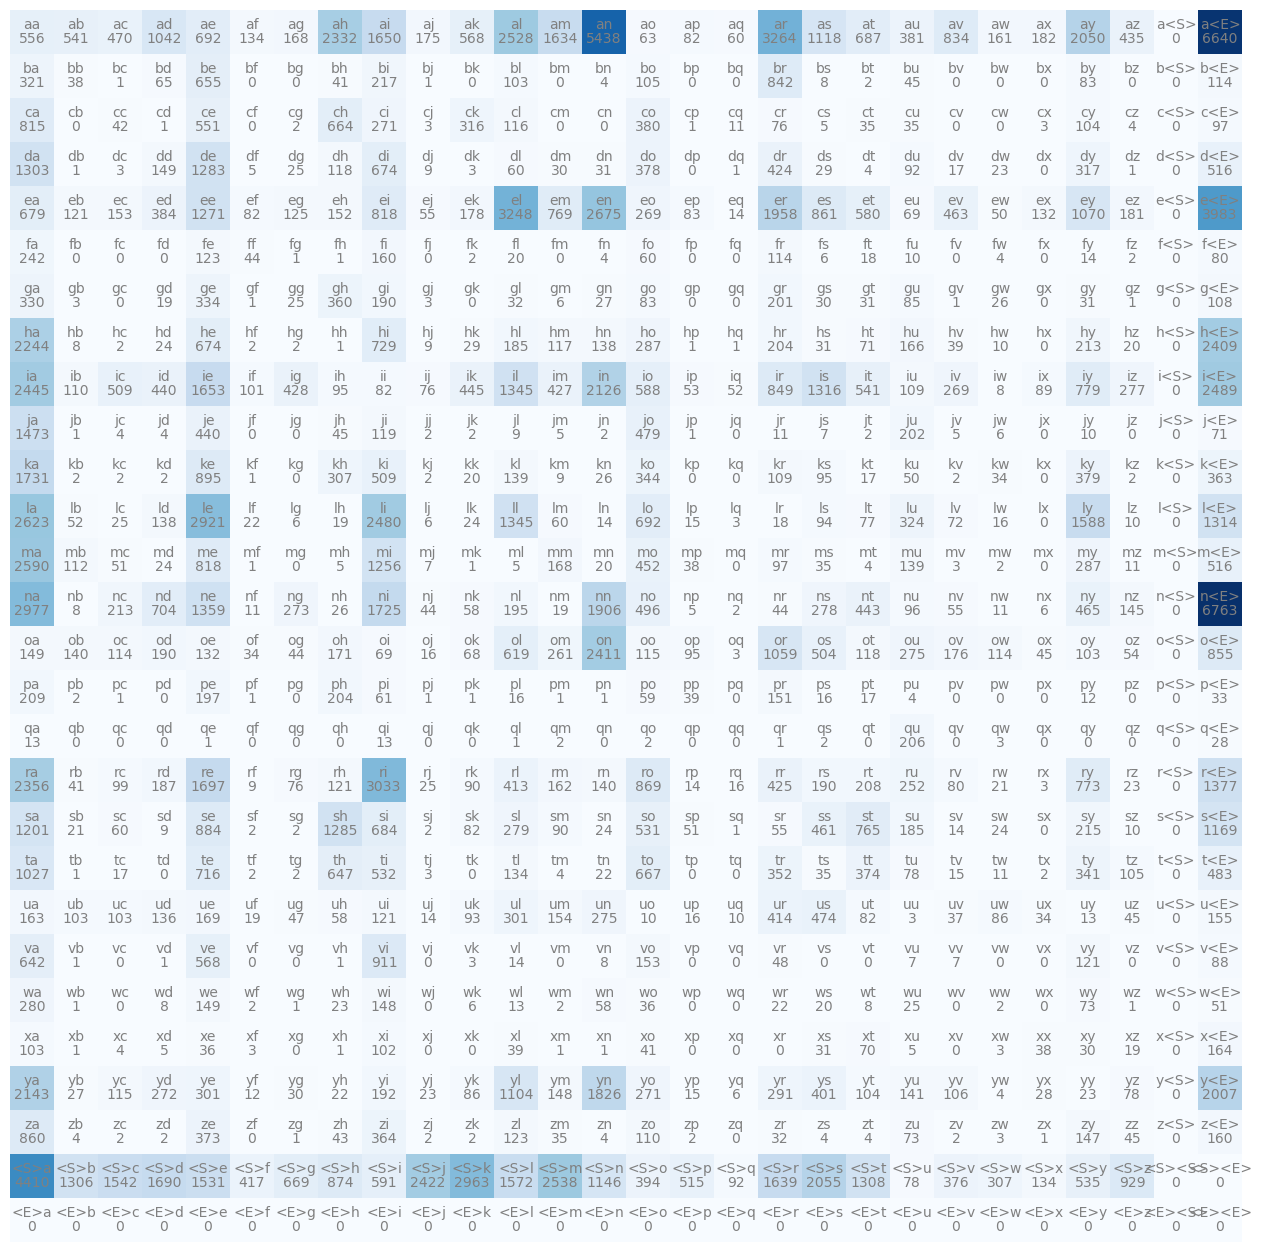

In [14]:
plt.figure(figsize = (16,16))
plt.imshow(N, cmap = 'Blues')
for i in range(28):
    for j in range (28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha = "center", va = "bottom", color = 'gray')
        plt.text(j, i, N[i,j].item(), ha="center", va = "top",color = 'gray')

plt.axis('off');    
plt.show()

### 使用一个特殊标记
1. 之前语义冗余，有很多不可能的组合
2. 右下角s和e很冗余，<S> 和 <E> 这两个特殊字符都被安排在索引 26 和 27

In [157]:
N = torch.zeros((27, 27), dtype = torch.int32)

In [158]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
itos


{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [159]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip (chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] +=1
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

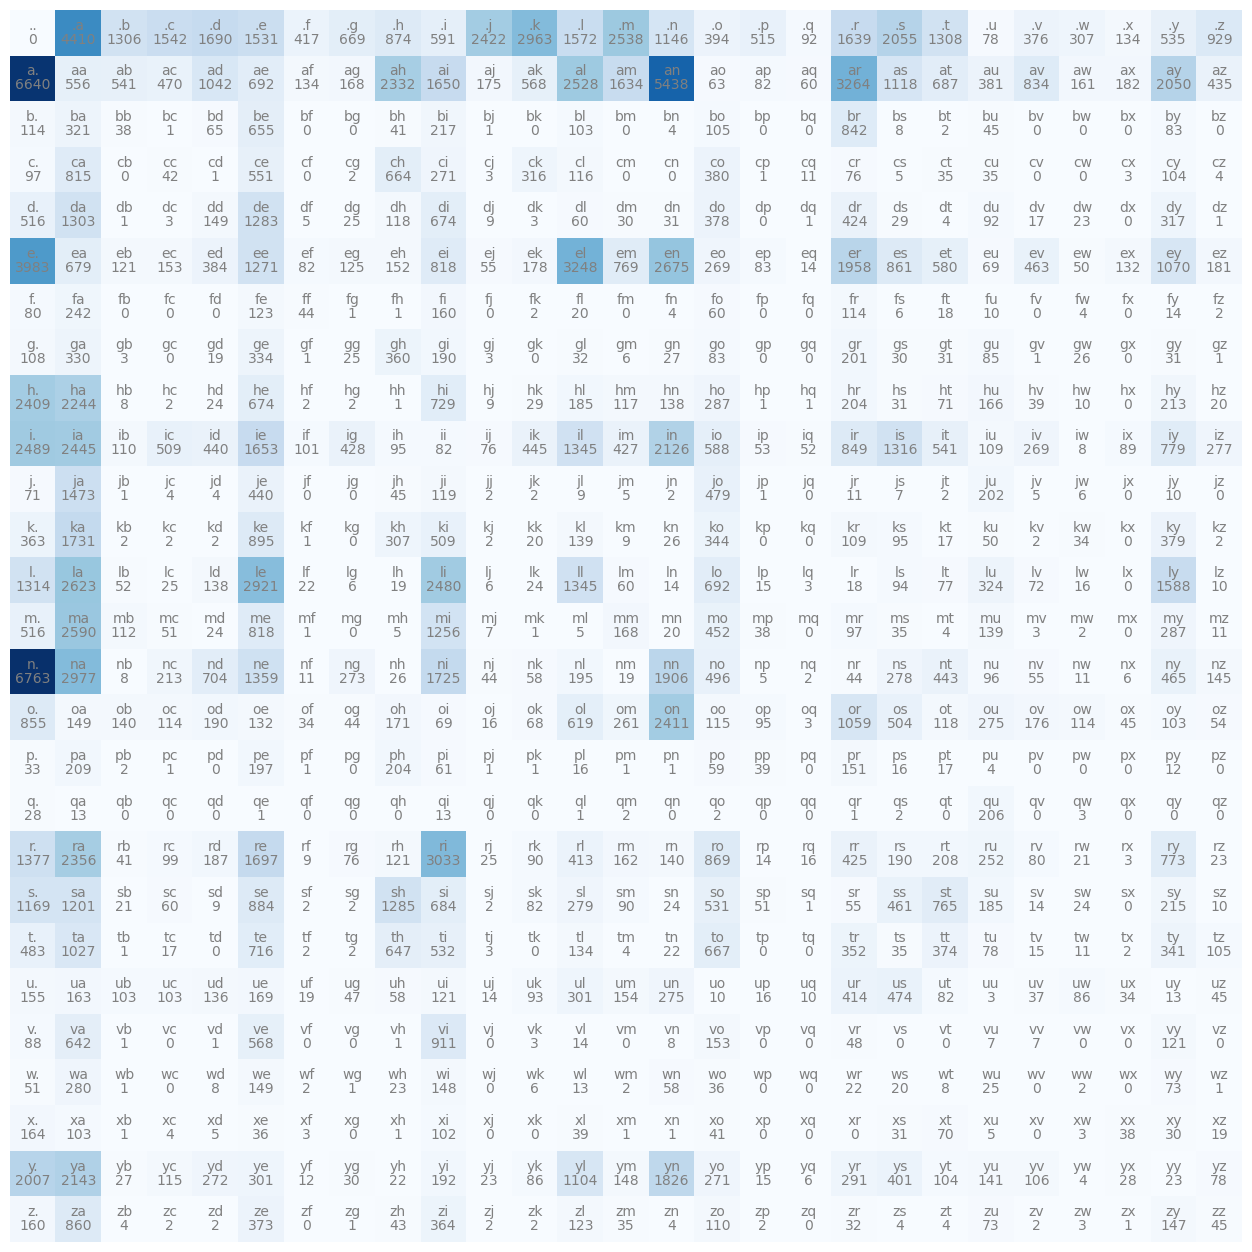

In [160]:
plt.figure(figsize=(16,16))
plt.imshow(N,'Blues')
for i in range (27):
    for j in range (27):
        chstr = itos[i] + itos[j]
        plt.text(j,i, chstr,ha = "center", va = "bottom", color = 'gray')
        plt.text(j,i,N[i,j].item(), ha = "center", va = "top",color = 'gray')
plt.axis('off')
plt.show()


### 将频数转化成概率

normalise

In [120]:
p = N[0].float()
p /= p.sum()
p


tensor([0.0000, 0.1409, 0.0404, 0.0483, 0.0511, 0.0491, 0.0128, 0.0207, 0.0272,
        0.0187, 0.0745, 0.0921, 0.0505, 0.0807, 0.0359, 0.0117, 0.0159, 0.0028,
        0.0510, 0.0641, 0.0393, 0.0023, 0.0118, 0.0092, 0.0041, 0.0162, 0.0287])

In [121]:
p.sum()

tensor(1.0000)

### sample from the distribution
torch.multionmial pytorch生成器对象 

In [122]:
g = torch.Generator().manual_seed(114514)
p = torch.rand(3,generator =g)
p = p/p.sum()


In [123]:
ix = torch.multinomial(p,num_samples =100, replacement = True, generator = g)
ix

tensor([1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2,
        1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        2, 0, 1, 0, 2, 1, 0, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 2, 1, 1])

### 这里测试一下张量的计算

In [124]:
P = N.float()
P.shape



torch.Size([27, 27])

In [125]:
#这里随意调试，注意观察执行后的形状
P.sum(0,keepdim=True).shape
#张量的索引结构：二维张量的每个元素通过 (a, b) 索引定位,对axis=0求和就是对每一个给定的b（tuple的其他元素），让a（tuple的第0个元素）变化，求所有可能的(a, b)对应的元素的和,这个适用于任意n维tensor


torch.Size([1, 27])

### 回到主线，继续生成

In [200]:
#这里尝试进行平滑处理
P = (N+1).float()
# P = N.float()
P = P/ P.sum(1,keepdim=True)#([27,27])/([27,1])注意，这里如果没有keepdim,则会有问题，注意看拓展方向。ps:原地操作更快，底层也不会有新内存
#广播机制一定要注意

In [201]:
P[0].sum()

tensor(1.)

In [ ]:
#加入温度机制


In [154]:
g = torch.Generator().manual_seed(114514)


#可以加一个温度系数
T =  0.9
for i in range(100):   
    out = []
    ix = 0
    while True:
        p = P[ix]
        #不必每次循环都执行这段 
        # p = N[ix].float()#这里表示取当前字符的 bigram 频率分布
        # p = p/p.sum()

        p = p ** (1 /T)
        p = p / p.sum()   # 重新归一化
        ix = torch.multinomial(p, num_samples=1,replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

ka.
anala.
h.
kandeerey.
je.
etlezayamose.
than.
aquds.
lestollimynnanaimmma.
con.
tomatoclacha.
delan.
ryonelon.
eo.
jar.
yalylithoubee.
ke.
keeon.
zen.
y.
briaiyae.
benuna.
zah.
n.
ma.
zrolleva.
i.
livae.
erysomabh.
abake.
speligelemin.
huh.
kal.
h.
ay.
ta.
daele.
a.
kyanitylaskey.
y.
ksthana.
gi.
e.
jasavecha.
onay.
evitryn.
eys.
i.
di.
y.
sucemahrzlalysla.
bratra.
ja.
ik.
anyllann.
a.
keonayn.
s.
mdelonan.
n.
kamin.
ragn.
keraya.
mukamyahamicagh.
yarabra.
chm.
msiky.
lani.
ari.
tsel.
mianes.
kon.
arija.
iel.
kak.
relamonon.
ta.
eeshi.
washeinnzia.
jane.
fanni.
an.
arilayahmaberamali.
hashim.
thah.
ja.
sor.
e.
san.
zyay.
lanakaven.
jaria.
chain.
a.
m.
an.
sa.
k.
waririhanayn.
jamina.


### 评估模型
先看一看概率


In [ ]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [202]:
log_likelihood = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        # print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll = }')
print(f'{nll/n=}')

 

log_likelihood=tensor(-559951.5625)
nll = tensor(559951.5625)
nll/n=tensor(2.4544)


### 神经网络框架
之前已经训练好了一个比较好的双字符级语言模型，现在我们需要将其转化为神经网络框架，任然是自字符级语言模型，以负对数似然来作为损失函数，用梯度下降法来优化 

#### 第一步，创建一个训练集合

In [204]:
xs, ys = [], []

for w in words[:1]:
    chs = ['.']+ list(w)+ ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        print(ch1,ch2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [205]:
xs

tensor([ 0,  5, 13, 13,  1])

In [206]:
ys

tensor([ 5, 13, 13,  1,  0])

#### 第二步:输入到神经网络

1. 词嵌入

In [212]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes = 27).float()
xenc 

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [215]:
xenc.shape

torch.Size([5, 27])

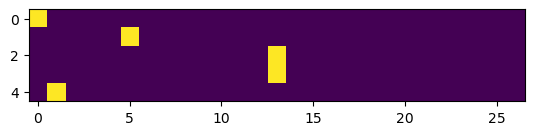

In [210]:
plt.imshow(xenc)
plt.show()

2. 初始化权重

In [232]:
g = torch.Generator().manual_seed(114514)
W = torch.randn((27,27),generator = g)
xenc @ W  #(5*27)

tensor([[ 0.1650, -0.4287, -0.0243,  0.1494, -0.0707,  0.2166, -1.0899,  0.8957,
         -0.3290,  1.1737,  0.4591, -2.0881, -0.6877, -0.3295, -0.1752,  0.8331,
         -1.6071, -0.4602,  0.1318,  1.3799,  1.0430,  1.2995,  1.9181,  0.4758,
          0.8900, -1.1867, -0.3634],
        [-0.4886, -0.6166, -0.2776,  0.2981,  1.0800,  1.1979, -0.2874,  0.6528,
          0.1119, -1.1386,  0.1463,  0.0448, -0.9430,  1.1630,  0.3978,  0.7836,
          0.2460, -0.2397, -1.4374, -2.4402,  3.1478, -0.7410, -0.5048,  0.1538,
         -1.0995, -0.1746,  1.2145],
        [-1.2597, -1.5363, -1.1237, -1.9495, -0.7321, -0.4131,  0.2545,  0.2181,
          2.0926,  0.1721, -1.7491,  0.9411, -0.6403,  1.1052, -0.2162,  0.2567,
          0.4870,  0.3254,  0.8063,  2.1936,  1.1552,  0.6775,  0.3377, -0.9997,
          0.0281, -1.0359, -0.4849],
        [-1.2597, -1.5363, -1.1237, -1.9495, -0.7321, -0.4131,  0.2545,  0.2181,
          2.0926,  0.1721, -1.7491,  0.9411, -0.6403,  1.1052, -0.2162,  0.2567

In [233]:
(xenc@W)[3,13]

tensor(1.1052)

In [234]:
xenc[3].shape

torch.Size([27])

In [235]:
W[:,13].shape

torch.Size([27])

In [236]:
#等价于
(xenc[3]*W[:,13]).sum()# (27,)  (27,)

tensor(1.1052)

3. 概率分布，逻辑回归前向传播

In [237]:
logits = xenc@W # log-counts
counts = logits.exp()# eruivalentN
probs = counts / counts.sum(1,keepdim=True)   
probs#(5,27)

tensor([[0.0273, 0.0151, 0.0226, 0.0268, 0.0215, 0.0287, 0.0078, 0.0566, 0.0166,
         0.0748, 0.0366, 0.0029, 0.0116, 0.0166, 0.0194, 0.0532, 0.0046, 0.0146,
         0.0264, 0.0919, 0.0656, 0.0848, 0.1574, 0.0372, 0.0563, 0.0071, 0.0161],
        [0.0110, 0.0097, 0.0136, 0.0243, 0.0530, 0.0596, 0.0135, 0.0346, 0.0201,
         0.0058, 0.0208, 0.0188, 0.0070, 0.0576, 0.0268, 0.0394, 0.0230, 0.0142,
         0.0043, 0.0016, 0.4191, 0.0086, 0.0109, 0.0210, 0.0060, 0.0151, 0.0606],
        [0.0062, 0.0047, 0.0072, 0.0031, 0.0106, 0.0146, 0.0284, 0.0274, 0.1783,
         0.0261, 0.0038, 0.0564, 0.0116, 0.0664, 0.0177, 0.0284, 0.0358, 0.0305,
         0.0493, 0.1973, 0.0699, 0.0433, 0.0308, 0.0081, 0.0226, 0.0078, 0.0135],
        [0.0062, 0.0047, 0.0072, 0.0031, 0.0106, 0.0146, 0.0284, 0.0274, 0.1783,
         0.0261, 0.0038, 0.0564, 0.0116, 0.0664, 0.0177, 0.0284, 0.0358, 0.0305,
         0.0493, 0.1973, 0.0699, 0.0433, 0.0308, 0.0081, 0.0226, 0.0078, 0.0135],
        [0.0076, 0.0509,

In [238]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram:
    x = xs[i].item()   # input character index
    y = ys[i].item()   # label character index
    print('--------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the net to the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0273, 0.0151, 0.0226, 0.0268, 0.0215, 0.0287, 0.0078, 0.0566, 0.0166,
        0.0748, 0.0366, 0.0029, 0.0116, 0.0166, 0.0194, 0.0532, 0.0046, 0.0146,
        0.0264, 0.0919, 0.0656, 0.0848, 0.1574, 0.0372, 0.0563, 0.0071, 0.0161])
label (actual next character): 5
probability assigned by the net to the correct character: 0.02871127799153328
log likelihood: -3.5504653453826904
negative log likelihood: 3.5504653453826904
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0110, 0.0097, 0.0136, 0.0243, 0.0530, 0.0596, 0.0135, 0.0346, 0.0201,
        0.0058, 0.0208, 0.0188, 0.0070, 0.0576, 0.0268, 0.0394, 0.0230, 0.0142,
        0.0043, 0.0016, 0.4191, 0.0086, 0.0109, 0.0210, 0.0060, 0.0151, 0.0606])
label (actual next character): 13
probability assigned by the net to the correct character: 0.057587

4. optomization梯度下降优化负对数似然损失函数(下卖从头开始完整步骤)

In [244]:
xs

tensor([ 0,  5, 13, 13,  1])

In [245]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
# -----------------------------
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [262]:

# -----------------------------
# forward pass
xenc = F.one_hot(xs, num_classes=27).float()          # input to the network: one-hot encoding
logits = xenc @ W                                     # predict log-counts
counts = logits.exp()                                 # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True)         # probabilities for next character(5,27)




In [263]:
probs.shape

torch.Size([5, 27])

In [264]:
loss = -probs[torch.arange(5),ys].log().mean()  #注意原理,等价于
# tensor([
#     probs[0, 5],
#     probs[1, 13],
#     probs[2, 13],
#     probs[3, 1],
#     probs[4, 0]
# ])

loss

tensor(3.7091, grad_fn=<NegBackward0>)

In [259]:
#backward pass
W.grad = None
loss.backward()


In [260]:
W.grad#(27,27)梯度是正的权重，增加那个权重值，损失会增大

tensor([[ 0.0122,  0.0020,  0.0025,  0.0008,  0.0034, -0.1974,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0473,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0291],
        [-0.1969,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0216,  0.0026,
          0.0025,  0.0010,  0.0204,  0.0017,  0.0197,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [261]:
#手动跟新权重，再返回去看损失如何变化
W.data += -0.1 * W.grad

### 再次整理一下，完整自动训练

In [265]:
# create the dataset
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [ ]:
# 正则化
(W**2).mean()

tensor(1230.5449, grad_fn=<SumBackward0>)

In [269]:
# gradient descent
for k in range(100):

    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()      # input to the network: one-hot encoding
    logits = xenc @ W                                 # predict log-counts
    counts = logits.exp()                             # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True)     # probabilities for next character
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
    print(loss.item())

    # backward pass
    W.grad = None     # set to zero the gradient
    loss.backward()

    # update
    W.data += -50 * W.grad

2.489532470703125
2.4893808364868164
2.489234209060669
2.4890923500061035
2.488954544067383
2.4888200759887695
2.488689422607422
2.4885616302490234
2.4884371757507324
2.488316059112549
2.4881973266601562
2.488081693649292
2.4879684448242188
2.4878578186035156
2.4877498149871826
2.4876437187194824
2.4875404834747314
2.4874393939971924
2.487340211868286
2.487243175506592
2.4871482849121094
2.4870550632476807
2.486963987350464
2.486874580383301
2.4867873191833496
2.486701726913452
2.4866178035736084
2.4865353107452393
2.486454963684082
2.486375570297241
2.486298084259033
2.4862220287323
2.486147403717041
2.486074209213257
2.4860024452209473
2.4859321117401123
2.485862970352173
2.485795021057129
2.4857287406921387
2.4856631755828857
2.4855990409851074
2.4855360984802246
2.485473871231079
2.4854133129119873
2.485353946685791
2.485295057296753
2.4852373600006104
2.485180616378784
2.4851253032684326
2.4850704669952393
2.4850168228149414
2.484963893890381
2.484912157058716
2.484861135482788
2.

结果与之前上面直接估计概率和样本的损失几乎一直，简单模型（bigram + 线性层）的上限就是统计频率分布

与先前对应
1. 基本架构不变
2. one-hot相当于查表
3. 该神经网络架构本身有类似平滑处理的效果 ，正则化,上面(N+1)增减1意味着正则损失增加0.01那项